In [10]:
import PyMca5 as mca
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'png'

specdir = '/users/opid01/edo/inhouse_edo/IHR_20161114/spec/'

Specify specfile:

In [20]:
specfile = '20161115_E16088.spec'

Load it and inspect what scans are there:

In [21]:
sf = mca.specfile.Specfile(specdir+specfile)
print('n of scans is {0}'.format(sf.scanno()))

n of scans is 222


Select the desired scan number.

In [22]:
n = 1
scan = sf[n]
data = scan.data()

List the possible indices available:

In [23]:
index_list = sf[n].alllabels()
print(index_list)

['phi', 'H', 'K', 'L', 'Epoch', 'Seconds', 'bv1', 'opt1', 'opt2', 'bv2', 'att2', 'bv3', 'bv4', 'exp2', 'Srcur', 'roi1', 'roi2', 'roi3', 'roi4', 'roi5', 'mpx4ro1', 'mpx4ro2', 'mpx4inr', 'exp1', 'mpx4int']


In [27]:
data[index_list.index('mpx4int')]

array([   692.,    709.,    658.,    609.,    642.,    727.,    697.,
          680.,    694.,    721.,    681.,    705.,    685.,    655.,
          723.,    659.,    721.,    679.,    669.,    722.,    687.,
          730.,    742.,    685.,    683.,    736.,    706.,    686.,
          727.,    693.,    688.,    732.,    731.,    707.,    683.,
          738.,    717.,    747.,    743.,    711.,    777.,    694.,
          714.,    683.,    729.,    743.,    713.,    709.,    710.,
          731.,    773.,    739.,    771.,    787.,    719.,    770.,
          713.,    712.,    742.,    815.,    793.,    775.,    815.,
          759.,    828.,    779.,    716.,    757.,    771.,    790.,
          786.,    818.,    856.,    786.,    803.,    823.,    808.,
          797.,    871.,    850.,    830.,    851.,    837.,    873.,
          865.,    844.,    798.,    883.,    886.,    878.,    817.,
          860.,    923.,    847.,    888.,    912.,    953.,    889.,
          892.,    9

Choose an index from the list:

In [6]:
what2plot = 'roi5'

Access the rawdata...

In [13]:
rawdata = data[index_list.index(what2plot)] 
motor_1 = data[index_list.index('adcX')]
motor_2 = data[index_list.index('adcY')]

...visualise the command that executed the kmap...

In [14]:
scan.command()

'pscando pix 98.5 101.5 60 piy 98.5 101.5 60 0.05 fs'

...and use it to exctract the image dimensions. Apply them to the data:

In [22]:
new_shape = (int(scan.command().split()[4]), int(scan.command().split()[8]))
# apply dimensions
rawdata.shape, motor_1.shape, motor_2.shape = new_shape, new_shape, new_shape
print 'rawdata and motor shapes: {0}'.format(new_shape)

rawdata and motor shapes: (60, 60)


Plot it!

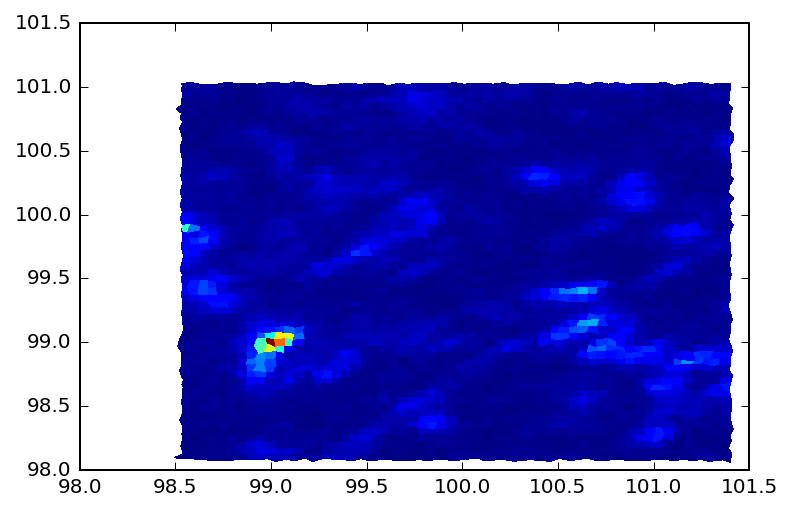

In [24]:
plt.pcolormesh(motor_1, motor_2, rawdata);

### Old / extra

Define steps and labels for plotting:

In [16]:
step1=((float(scan.command().split()[3])-float(scan.command().split()[2]))
   /int(scan.command().split()[4]))
step2=((float(scan.command().split()[7])-float(scan.command().split()[6]))
   /int(scan.command().split()[8]))
xlabels = (np.around(np.arange(float(scan.command().split()[2]),float(scan.command().split()[3])+
                           (float(scan.command().split()[3])-float(scan.command().split()[2]))
                           /int(scan.command().split()[4]),step1*5),2))
ylabels = (np.around(np.arange(float(scan.command().split()[6]),float(scan.command().split()[7])+
                           (float(scan.command().split()[7])-float(scan.command().split()[6]))
                           /int(scan.command().split()[8]),step2*5),2))

Plot it!

In [17]:
sample_name = 'e16019'

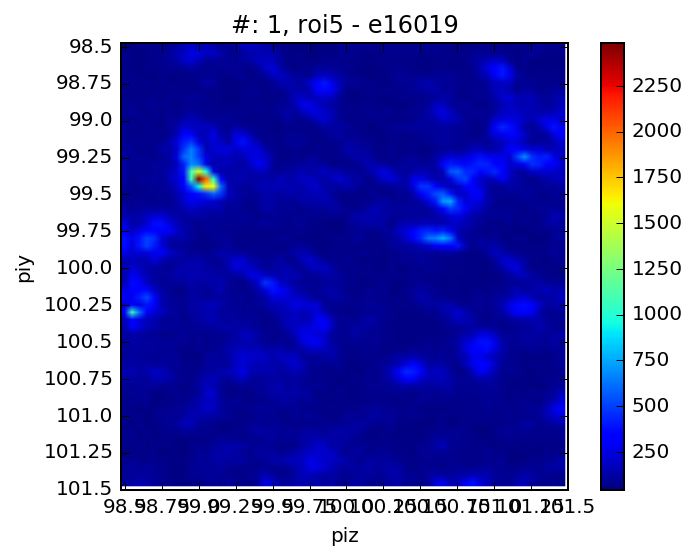

In [19]:
plt.imshow(rawdata)
plt.title('#: {0}, {1} - '.format(n, what2plot)+sample_name)
plt.xticks(np.arange(0,int(scan.command().split()[4])+1,5),xlabels)
plt.yticks(np.arange(0,int(scan.command().split()[8])+1,5),ylabels)
plt.ylabel('piy')
plt.xlabel('piz')
plt.colorbar()
plt.show()

One scan, multiple ROIs.

In [23]:
rois = ['mpx4ro1', 'roi4', 'roi5']

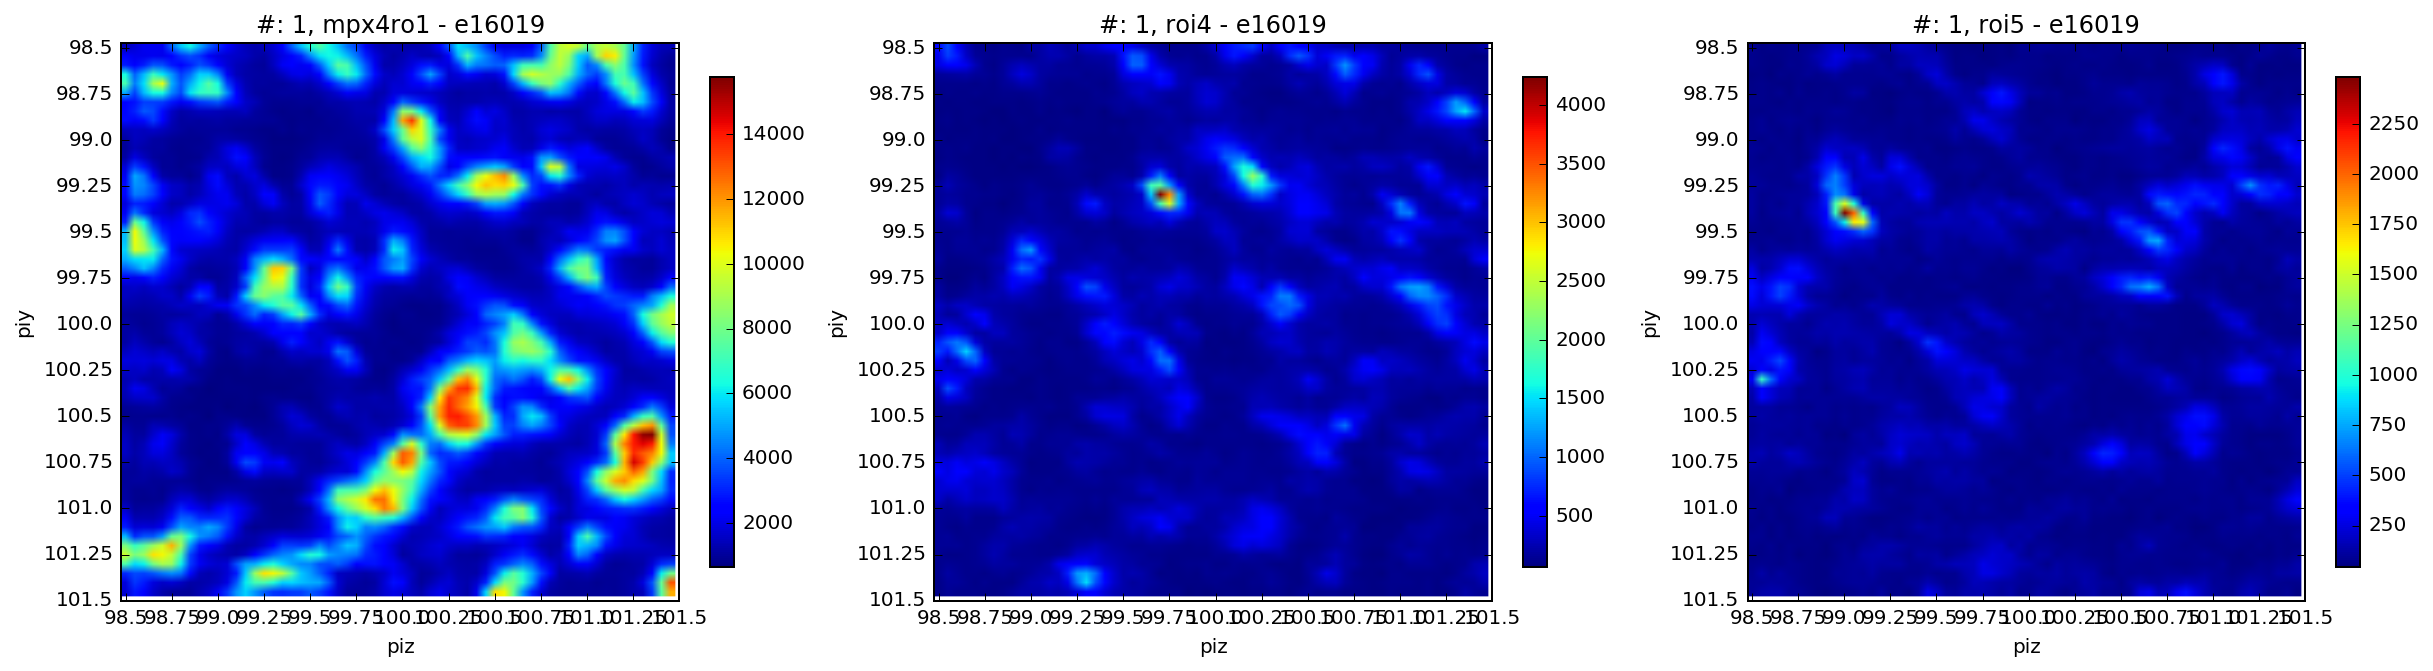

In [24]:
fig = plt.figure(figsize=(17,5))
tot_fig = len(rois)
for index, what2plot in enumerate(rois):
    plt.subplot(1,tot_fig,index+1)
    rawdata = data[index_list.index(what2plot)]
    rawdata.shape = new_shape
    plt.imshow(rawdata)
    plt.title('#: {0}, {1} - '.format(n, what2plot)+sample_name)
    plt.xticks(np.arange(0,int(scan.command().split()[4])+1,5),xlabels)
    plt.yticks(np.arange(0,int(scan.command().split()[8])+1,5),ylabels)
    plt.ylabel('piy')
    plt.xlabel('piz')
    plt.colorbar(fraction=0.04)
fig.tight_layout()